# Predicting Heart Disease

## Summary

### Introduction

Heart disease is an umbrella term that refers to several conditions that affect the health of one's heart. Common heart diseases include disease of the blood vessel, arrhythmia (irregular beating of the heart), disease of the heart valve and muscle, infection of the heart, and heart defects from birth (“Heart Disease.”). The symptoms of one’s  heart disease is very dependent on the type of disease they have, however many forms can be prevented with healthy lifestyle choices. Most heart diseases (with the exception of serious defects at birth) are only diagnosed after a heart attack, heart failure, or stroke (“Heart Disease.”).  Heart attacks, heart failure, and strokes are very traumatic events to go through and are oftentimes deadly (“Heart Disease and Stroke.”). Therefore it is very important that we are able to predict if an individual is at an increased risk of heart disease and try to get them preventable care. In this project we want to determine if we can predict if someone is at risk of a heart disease based on the following variables.

We used data from UCI Machine Learning (https://archive-beta.ics.uci.edu/ml/datasets/heart+disease). The Cleveland Heart Disease dataset consists of 13 explanatory variables and 1 target class. The variables, variable type and a brief description of each variable are listed below.

#### Figure 1: Variable Descriptions

| Variable | Variable Type | Description |
| :-: | :-: | :-: |
| Age | Quantitative | Age of patient in years |
| Sex | Categorical | Sex of patient where 0 = female and 1 = male |
| Chest Pain | Categorical | Type of chest pain the patient has where 1 = typical angina, 2 = atypical angina, 3 = non-anginal, 4 = asymptomatic |
| Resting Blood Pressure | Quantitative | Resting blood pressure of the patient measured at admission to the hospital in mm Hg |
| Serum Cholesterol | Quantitative | Serum Cholesterol is the total amount of cholesterol a patient has in their blood. It is measured in mg/dl |
| Fasting Blood Sugar | Categorical | The blood sugar level of the patient after fasting where 0 if blood sugar is less than 120mg/dl and 1 otherwise |
| Resting ECG | Categorical | The results of the patients resting electrocardiographic where 0 = normal results, 1 = S-T wave abnormality, 2 = left ventricular hypertrophy |
| Max Heart Rate | Quantitative | The maximum heart rate that the patient had in bpm |
| Exercise Induced Angina | Categorical | If the patient has exercised induced angina (chest pain caused by reduced blood flow) where 0 = no and 1 =yes |
| Oldpeak | Quantitative | The ST depression (ECG measurement of the heart) a patient has induced by exercise relative to rest in mm|
| Slope | Categorical | The slope of peak exercise ST segment of patient where 1 = upsloping, 2 = flat, 3 = downsloping |
| Number of Major Blood Vessels | Quantitative | The number of major blood vessels |
| Thalassemia | Categorical | Occurrence of thalassemia in the patient (blood disorder that causes patient to have reduced amounts of hemoglobin) where 3 = normal, 6 = fixed defect, and 7 = reversible defect |
| Diagnosis | Categorical | Presence of heart disease in the patient from 0 to 4 where 0 indicates no presence of heart disease. This is the target column |


# Methods & Results

We started by loading the heart disease data set and adding a column headers. The database has 14 features. For the purpose of this analysis, we have focused on the Diagnosis feature. Based on the data description, any value over 0 has a heart disease and 0 indicates no presence of heart disease. 

We grouped the data by its diagnosis. Then we applied data cleaning. We checked for the data type and for any mistakes about the characters. We further dealt with the NA values. 

## Packages

In [1]:
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(GGally)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidymod

In [2]:
source("../R/clean_data.r")
source("../R/accuracy_plot.r")
source("../R/diagnosis.r")
source("../R/attribe_box_plots.r")

Warning message in file(filename, "r", encoding = encoding):
“cannot open file '../R/attribe_box_plots.r': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [3]:
heart_disease <- read.csv("../data/processed-cleveland.csv", header = FALSE)

Before any data analysis can be done, the data needs to be cleaned. The downloaded data does not have any column names so first we need to add all the variables to their respective column.

In [145]:
colnames(heart_disease) <- c("age",
                             "sex",
                             "chest_pain",
                             "resting_blood_pressure",
                             "serum_cholesterol",
                             "fasting_blood_sugar",
                             "resting_ecg",
                             "max_heart_rate",
                             "exercise_induced_angina",
                             "oldpeak",
                             "slope",
                             "num_of_major_vessels",
                             "thalassemia",
                             "diagnosis")

In [146]:
head(heart_disease, 10)

,age,sex,chest_pain,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,num_of_major_vessels,thalassemia,diagnosis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
7,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
8,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
9,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


The next step in cleaning up the data is to check for NAs. It is important that we remove these before any data analysis so that the functions we use will run on the data properly. Using the `colMeans` function we get the percentage of NAs in each column.

In [147]:
colMeans(is.na(heart_disease))

age                     sex              chest_pain 
                      0                       0                       0 
 resting_blood_pressure       serum_cholesterol     fasting_blood_sugar 
                      0                       0                       0 
            resting_ecg          max_heart_rate exercise_induced_angina 
                      0                       0                       0 
                oldpeak                   slope    num_of_major_vessels 
                      0                       0                       0 
            thalassemia               diagnosis 
                      0                       0

As we can see above, it looks like we have no NAs in our data. However on the UCI ML website, we know that our data has missing values.

In [148]:
unique(heart_disease)

,age,sex,chest_pain,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,num_of_major_vessels,thalassemia,diagnosis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
7,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
8,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
9,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


Instead of R recognizing our missing values, we have a question mark. We need to convert this to an actual NA that R will recognize.

In [149]:
heart_disease_clean <- clean_data(heart_disease)

Now if we run our `colMeans` function again we will see that we do have missing values in num_of_major_vessels and thalassemia. We now need to remove these missing values.

In [150]:
colMeans(is.na(heart_disease_clean))

age                     sex              chest_pain 
                      0                       0                       0 
 resting_blood_pressure       serum_cholesterol     fasting_blood_sugar 
                      0                       0                       0 
            resting_ecg          max_heart_rate exercise_induced_angina 
                      0                       0                       0 
                oldpeak                   slope    num_of_major_vessels 
                      0                       0                       0 
            thalassemia               diagnosis 
                      0                       0

Since the mean of each column is 0 we can tell that there are no more missing values in our dataset.

## Exploring Dataset

Next we need to get to know our data. We will do this by performing exploratory analysis where we summarize our data and graph a few relevant figures. The aim of doing this is to get a better understanding of what our final classification analysis will look like.

The `glimpse`function allows us to easy tell what type of data we have (i.e. are variables made of integers or characters). This is especially important for our dataset since we have categorical data that is separated into groups with numerical values, for example there are three categories in a given variable and they are given a label from 1 to 3.

In [151]:
glimpse(heart_disease_clean)

Rows: 297
Columns: 14
$ age                     <dbl> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56…
$ sex                     <dbl> 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1…
$ chest_pain              <dbl> 1, 4, 4, 3, 2, 2, 4, 4, 4, 4, 4, 2, 3, 2, 3, 3…
$ resting_blood_pressure  <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 1…
$ serum_cholesterol       <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 2…
$ fasting_blood_sugar     <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0…
$ resting_ecg             <dbl> 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0…
$ max_heart_rate          <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 1…
$ exercise_induced_angina <dbl> 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0…
$ oldpeak                 <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3…
$ slope                   <dbl> 3, 2, 2, 3, 1, 1, 3, 1, 2, 3, 2, 2, 2, 1, 1, 1…
$ num_of_major_vessels    <dbl> 0, 3, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0…
$ thalassemia     

We know that sex, chest_pain, fasting_blood_sugar, resting_ecg, exercise_induced_angina and slope are all categorical variables but we can see that R is interpreting them are quantitative variables. It is important for us keep this in mind when we process our data. Additionally we can see that in this dataset num_of_major_vessels and thalassemia are characters. Since num_of_major_vessels is a quantitative variable we will be converting this to a numerical type. We will also convert all the categorical variables into factor types. 

One thing to note is that our target class (diagnosis) has values from 0 to 4 where 0 means that heart disease was not present and 1-4 indicate increasing severity of the heart disease. For this analysis we will combine all instances where heart disease was present and represent that with a value of 1. We will do this with our custom `diagnosis` function. This function finds all instances of heart disease (1-4) and replaces them with the number 1 to indicate the presence of heart disease in a patient.

In [152]:
heart_disease_clean <- heart_disease_clean %>%
    mutate(num_of_major_vessels = as.numeric(num_of_major_vessels)) %>%
    diagnosis()


#code inspired by: https://stackoverflow.com/questions/35426903/change-class-of-multiple-columns-in-data-frame-without-for-loop
heart_disease_clean[,c(2:3, 6:7, 9, 11, 13:14)] <- lapply(heart_disease_clean[,c(2:3, 6:7, 9, 11, 13:14)], as.factor)



glimpse(heart_disease_clean)

Rows: 297
Columns: 14
$ age                     <dbl> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56…
$ sex                     <fct> 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1…
$ chest_pain              <fct> 1, 4, 4, 3, 2, 2, 4, 4, 4, 4, 4, 2, 3, 2, 3, 3…
$ resting_blood_pressure  <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 1…
$ serum_cholesterol       <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 2…
$ fasting_blood_sugar     <fct> 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0…
$ resting_ecg             <fct> 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0…
$ max_heart_rate          <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 1…
$ exercise_induced_angina <fct> 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0…
$ oldpeak                 <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3…
$ slope                   <fct> 3, 2, 2, 3, 1, 1, 3, 1, 2, 3, 2, 2, 2, 1, 1, 1…
$ num_of_major_vessels    <dbl> 0, 3, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0…
$ thalassemia     

In [153]:
summary(heart_disease) #summary

      age             sex           chest_pain    resting_blood_pressure
 Min.   :29.00   Min.   :0.0000   Min.   :1.000   Min.   : 94.0         
 1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:3.000   1st Qu.:120.0         
 Median :56.00   Median :1.0000   Median :3.000   Median :130.0         
 Mean   :54.44   Mean   :0.6799   Mean   :3.158   Mean   :131.7         
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:4.000   3rd Qu.:140.0         
 Max.   :77.00   Max.   :1.0000   Max.   :4.000   Max.   :200.0         
 serum_cholesterol fasting_blood_sugar  resting_ecg     max_heart_rate 
 Min.   :126.0     Min.   :0.0000      Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0     1st Qu.:0.0000      1st Qu.:0.0000   1st Qu.:133.5  
 Median :241.0     Median :0.0000      Median :1.0000   Median :153.0  
 Mean   :246.7     Mean   :0.1485      Mean   :0.9901   Mean   :149.6  
 3rd Qu.:275.0     3rd Qu.:0.0000      3rd Qu.:2.0000   3rd Qu.:166.0  
 Max.   :564.0     Max.   :1.0000      Max.   :2.0000   M

Since this project should be in the scope of DSCI 100 and we did not learn how to use one hot encoding to deal with categorical variables, we will drop all the categorical variables from our dataset. 

In [157]:
heart_disease_numerical <- heart_disease_clean[ -c(2:3, 6:7, 9, 11, 13)]

glimpse(heart_disease_numerical)

Rows: 297
Columns: 7
$ age                    <dbl> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56,…
$ resting_blood_pressure <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 14…
$ serum_cholesterol      <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 20…
$ max_heart_rate         <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 15…
$ oldpeak                <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.…
$ num_of_major_vessels   <dbl> 0, 3, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0,…
$ diagnosis              <fct> 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,…


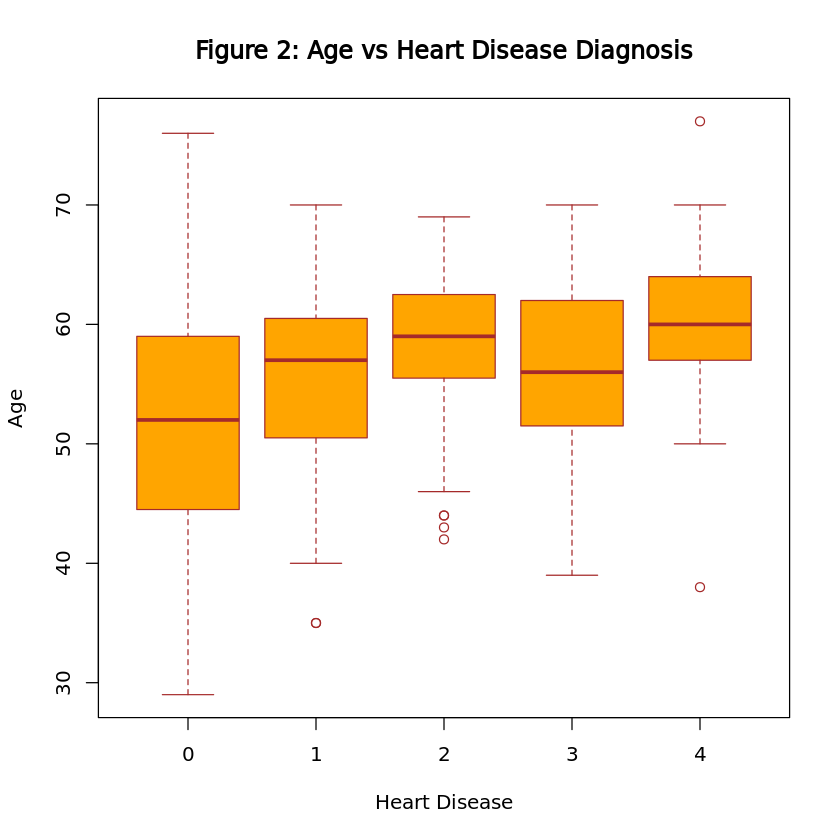

In [154]:
# boxplot(age ~ diagnosis,
# data=heart_disease_numerical,
# main="Figure 2: Age vs Heart Disease Diagnosis",
# xlab="Heart Disease",
# ylab="Age",
# col="orange",
# border="brown"
# )

attribute_box_plots(heart_disease_numerical, diagnosis)

Through this plot we can see that the most common age to have a heart disease ranges from 55 to 60 and looking at the outliers 

We grouped the data by its diagnosis and graphed it in order for us to see if the dataset is balanced or not. 

In [155]:
num_obs <- nrow(heart_disease_clean)
diagnosis_heart_disease <- group_by(heart_disease_clean, diagnosis) %>%
                                summarize(count = n(),
                                          percentage = n() / num_obs * 100)
diagnosis_heart_disease


diagnosis,count,percentage
<fct>,<int>,<dbl>
0,160,53.87205
1,137,46.12795


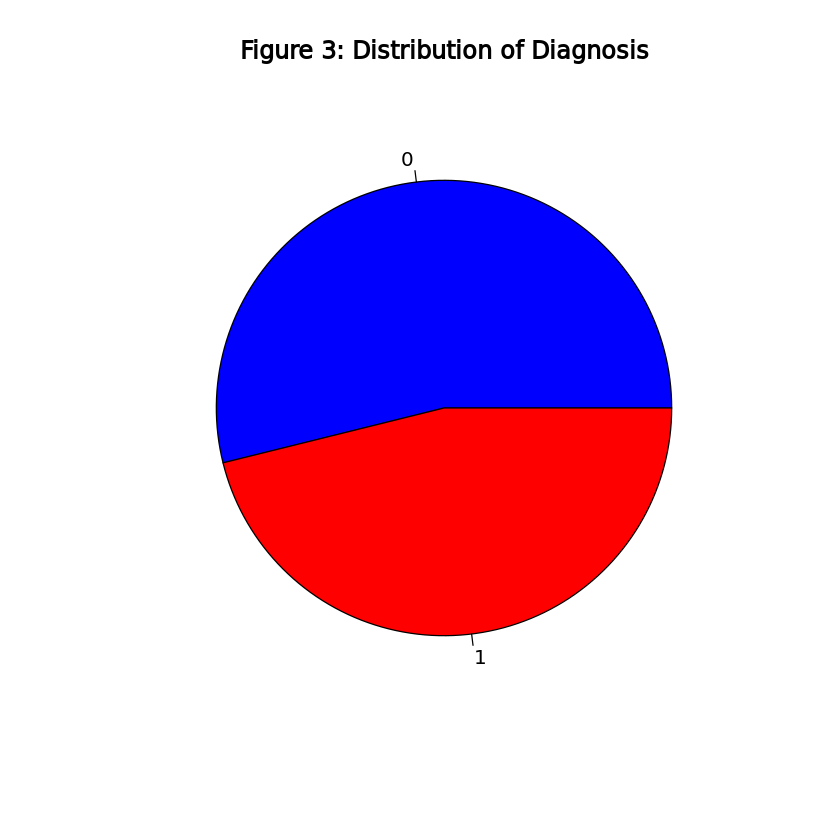

In [156]:
pie(table(heart_disease_clean$diagnosis), main = "Figure 3: Distribution of Diagnosis", col = c("Blue", "Red"))

As we can see the data looks fairly balanced. 

Warning message in ggcorr(heart_disease_numerical, label = TRUE, label_size = 4, :
“data in column(s) 'diagnosis' are not numeric and were ignored”


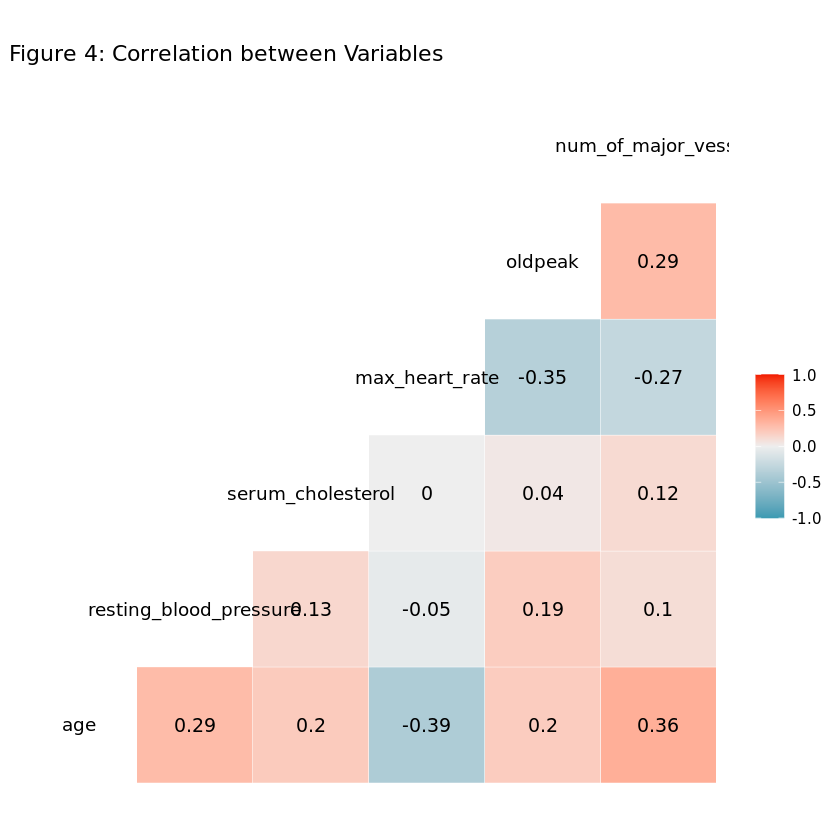

In [158]:
ggcorr(heart_disease_numerical, label = TRUE, label_size = 4, label_round = 2, label_alpha = FALSE) + 
ggplot2::labs(title = "Figure 4: Correlation between Variables")

In figure 4 we can see that most variables look like they have some correlation save for serum_cholesterol and max_heart_rate. While the correlations may not look very high, this is actually a good sign because highly correlated variables can lead to overly complicated models.

## Classification Analysis

Now that we have done our exploratory analysis we can begin training our classification model.

First we need to split our data. We do this so that after we create our model we can find the accuracy of our classifier.

In [159]:
set.seed(321)

heart_disease_split <- initial_split(heart_disease_numerical, prop = 0.75, strata = diagnosis)
hd_train <- training(heart_disease_split)
hd_test <- testing(heart_disease_split) 

Next we perform cross validation for our data. This is important because it allows us to get a more accurate idea of how our classifier is doing. If we did not use cross validation our classifier might be biased from an unbalanced validation set without us knowing. We are preprocess the data by creating a recipe. This step allows us to standardize our predictors so that any one predictor is not disproportionately affecting the classifier even if it has a larger number.

In [160]:
set.seed(321)

hd_vfold <- vfold_cv(hd_train, v = 5, strata = diagnosis)


recipe <- recipe(diagnosis ~ ., data = hd_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())


Next we create our classifier. The only parameter we can tune is the number of classifier we have. We are tuning our classifier to get the optimal number of neighbors as to increase accuracy.

In [161]:
set.seed(321)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")

In [162]:
set.seed(321)

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() %>%
    add_recipe(recipe) %>%
    add_model(knn_spec) %>%
    tune_grid(resamples = hd_vfold, grid = k_vals) %>%
    collect_metrics() 

accuracies <- knn_results %>%
    filter(.metric == "accuracy")


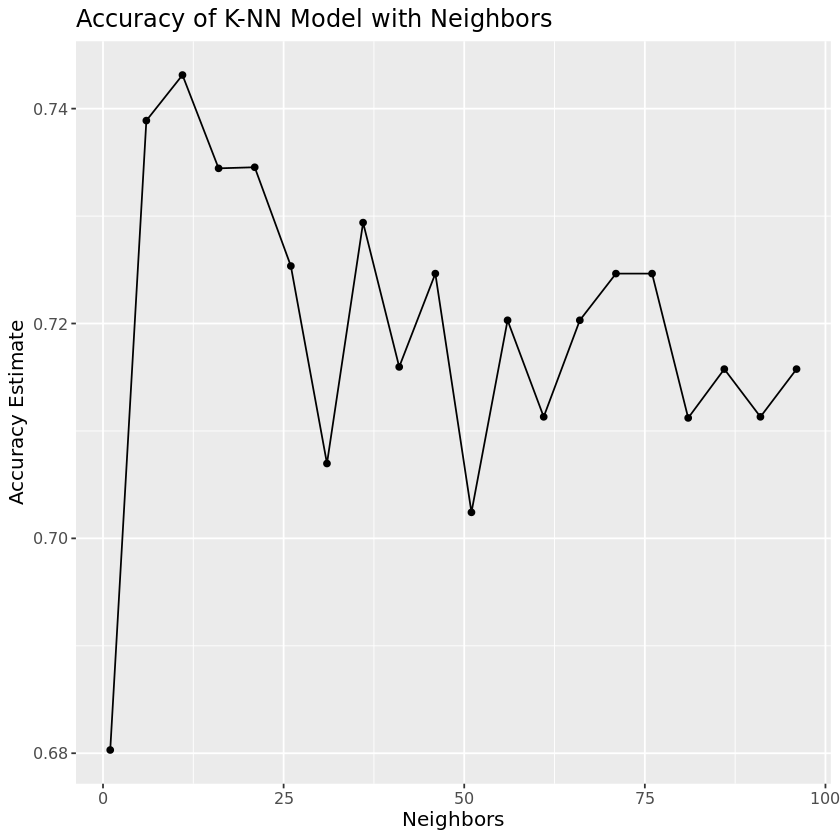

In [163]:
set.seed(321)

accuracy_vs_k <- accuracy_plot(accuracies)

accuracy_vs_k

From our graph above we can see that our accuracy peaks at around 12-13 neighbors. Therefore we will use that in our new classifier that we will use to predict.

In [164]:
set.seed(321)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 12) %>%
    set_engine("kknn") %>%
    set_mode("classification")

In [165]:
set.seed(321)

knn_fit <- workflow() %>%
    add_recipe(recipe) %>%
    add_model(knn_spec) %>%
    fit(data = hd_train)

In [166]:
set.seed(321)

hd_predictions <- predict(knn_fit, hd_test)  %>%
  bind_cols(hd_test)


hd_predictions %>%
    metrics(truth = diagnosis, estimate = .pred_class) %>%
    filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7333333


In [167]:
confusion_mat <- hd_predictions %>%
             conf_mat(truth = diagnosis, estimate = .pred_class)

print("Figure 6: Confusion Matrix of Results")
confusion_mat

[1] "Figure 6: Confusion Matrix of Results"


          Truth
Prediction  0  1
         0 32 12
         1  8 23

The confusion matrix above shows us that a majority of the predictions were given the right label. However we also see that the model is more likely to predict a false negative than a false positive.

## Discussion

In this project, we used 13 attributes to predict whether a person has heart disease or not. Many contributing factors can be considered for this prediction. Age is one of them. Based on our results, we saw that heart disease is more common among people between 55 to 60 years old. This aligns with our expectation that most heart disease diagnosis is in middle-aged people. We also saw that the other explanatory variables (resting_blood_pressure, serum_cholesterol, max_heart_rate, oldpeak, and num_of_major_vessels) can also be used to train a classification model and predict heart disease in people. We used the K-nearest neighbors algorithm for our classification. This is a simple and intuitive algorithm that works perfectly with our two-class classification problem. However we found that our accuracy was low (73%). This could be due to us dropping many categorical variables. Variables such as if the patient had chest pain, angina, or thalessemia could be very important in determining if they get heart disease ("Angina."). Thus we might have seen higher accuracy if we were able to use these variables.

In future studies, we could use more complex methods to increase the accuracy of our model. Predicting heart disease is remarkably useful for heart disease awareness. Early heart disease detection can be crucial for the treatment process and can save lives. Following our predictions, one can be advised to do checkups and detect early signs of heart diseases and start the treatment early (“The Importance of Early Detection.”). 

For future studies, one can study the difference between the contribution of these factors in heart disease detection. Our prediction model predicts more false negatives than false positives. This is not good because the prediction may suggest one has no heart disease who in fact has the disease. Therefore, in further studies, we can focus on building a more accurate model and decrease our amounts of false negatives. Having false positives, on the other hand, is not crucial to be taken care of since one may be a person prone to heart disease and can be advised to be more cautious and do more regular checkups. In this study, we focused on the numerical variables. For more accurate predictions, one can consider those categorical variables contributing to the presence of heart disease which can lead to a more reliable prediction. 

## References

“Angina.” Mayo Clinic, Mayo Foundation for Medical Education and Research, 12 June 2020, https://www.mayoclinic.org/diseases-conditions/angina/symptoms-causes/syc-20369373. 

“Cleveland Heart Disease Dataset.” UCI Machine Learning Repository, https://archive-beta.ics.uci.edu/ml/datasets/heart+disease. 

“Heart Disease and Stroke.” Centers for Disease Control and Prevention, Centers for Disease Control and Prevention, 27 Jan. 2022, https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm. 

“Heart Disease.” Mayo Clinic, Mayo Foundation for Medical Education and Research, 9 Feb. 2021, https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118. 

“The Importance of Early Detection.” Jupiter Medical Center, https://www.jupitermed.com/news-press-releases/2020/june/the-importance-of-early-detection/. 

ScransomScransom                    2. “Change Class of Multiple Columns in Data Frame without for Loop.” Stack Overflow, 1 Jan. 1964, https://stackoverflow.com/questions/35426903/change-class-of-multiple-columns-in-data-frame-without-for-loop. 